# Clustering

## Change in Mobility during COVID19 Pandemy

## 1. Introduction

This study is conducted to investigate the change in mobility behaviour during pandemy. In the scope of this study, Mobility Report published by Google is utilized. To be able to understand the reasons behind the change in mobility, various data from multiple sources are collected.

Creating dataframes and data cleaning process is explained here: https://github.com/DrFarukAydin/data-science-portfolio/blob/main/data-collection-merging-and-cleaning/mobility-dataframe-preparation.ipynb

This data is visualized with Tableau. You can check that from the following link: https://github.com/DrFarukAydin/data-science-portfolio/blob/main/data-visualization-tableau/data-visualization-tableau.ipynb

Some statistical tests were conducted to prepare the relationship between the mobility changes and weather (precipitation), city and county development index: https://github.com/DrFarukAydin/data-science-portfolio/blob/main/statistical-analysis/mobility-statistical-tests.ipynb

In this work, a clustering process is done to examine if a meaningful pattern between the groups of countries clustered by their mobility behaviour.

## 2. Importing Libraries & Data

First, the libraries are imported.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import urllib.request as urllib
import re
import matplotlib.dates as mdates

We import the dataframe that is prepared in the following work: https://github.com/DrFarukAydin/data-science-portfolio/blob/main/data-collection-merging-and-cleaning/mobility-dataframe-preparation.ipynb

In [2]:
df = pd.read_csv("../Traffic Studies/final_df.csv", low_memory=False)

In [3]:
df.head()

,Unnamed: 0,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,...,ilce_kademe,il_skor,il_kademe,Kurşunsuz Benzin,Motorin,precipitation [mm/day],rain,MINIMUM_TRAFFIC_INDEX,MAXIMUM_TRAFFIC_INDEX,AVERAGE_TRAFFIC_INDEX
0,0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10430715 entries, 0 to 10430714
Data columns (total 36 columns):
 #   Column                                              Dtype  
---  ------                                              -----  
 0   Unnamed: 0                                          int64  
 1   country_region_code                                 object 
 2   country_region                                      object 
 3   sub_region_1                                        object 
 4   sub_region_2                                        object 
 5   metro_area                                          object 
 6   iso_3166_2_code                                     object 
 7   census_fips_code                                    float64
 8   place_id                                            object 
 9   date                                                object 
 10  retail_and_recreation_percent_change_from_baseline  float64
 11  grocery_and_pharmacy_percent_change

In [5]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [6]:
df["date"] = pd.to_datetime(df["date"])

In [7]:
df["year"] = df["date"].apply(lambda x: x.year)
df["month"] = df["date"].apply(lambda x: x.month)
df["day"] = df["date"].apply(lambda x: x.day)

In [12]:
mobility_cols = ['retail_and_recreation_percent_change_from_baseline',
                 'grocery_and_pharmacy_percent_change_from_baseline',
                 'parks_percent_change_from_baseline',
                 'transit_stations_percent_change_from_baseline',
                 'workplaces_percent_change_from_baseline',
                 'residential_percent_change_from_baseline']

<br><br><br>

## 3. Clustering

In this Section, we try to cluster countries based on their mobility changes. Google provides the mobility changes in six different categories. Using these categories, we can manage to cluster the countries. Then, we can show them on a map colored by their cluster groups and we try to find their common properties.

<br><br>

### 3.1. Data Cleaning & Scaling

To begin with we should make an appropriate dataframe.

In [100]:
df_bycountry = df.groupby("country_region").mean()[mobility_cols]

In [101]:
df_bycountry

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
country_region,,,,,,
Afghanistan,28.449121,68.016332,26.825093,-3.283099,-4.839829,4.635810
Angola,18.976477,24.420701,49.769917,-1.894737,-0.017139,4.293880
Antigua and Barbuda,1.362663,4.368609,59.826992,-34.857976,-26.130075,1.518855
Argentina,-21.459172,8.606587,-41.396810,-29.584405,2.255780,6.781469
Aruba,-5.042806,2.637337,30.442331,-38.437574,-13.986047,1.650474
...,...,...,...,...,...,...
Venezuela,-7.547344,23.178984,-3.151270,-25.554273,-4.401848,11.019630
Vietnam,-17.715051,-0.131074,-13.024684,-21.629142,-9.456364,-1.952603
Yemen,54.060116,72.262125,72.439952,28.506540,19.899538,2.265589


In [102]:
df_bycountry.isnull().sum()

retail_and_recreation_percent_change_from_baseline    0
grocery_and_pharmacy_percent_change_from_baseline     0
parks_percent_change_from_baseline                    1
transit_stations_percent_change_from_baseline         1
workplaces_percent_change_from_baseline               0
residential_percent_change_from_baseline              3
dtype: int64

In [103]:
df_bycountry.dropna(axis=0,inplace=True)

In [104]:
df_bycountry.describe().T

,count,mean,std,min,25%,50%,75%,max
retail_and_recreation_percent_change_from_baseline,132.0,-5.101199,16.583020,-41.087375,-16.100020,-8.791580,0.905924,59.693382
grocery_and_pharmacy_percent_change_from_baseline,132.0,15.178603,22.070142,-21.852194,1.954099,9.706435,20.457837,100.651521
parks_percent_change_from_baseline,132.0,12.238088,30.670555,-45.326790,-12.538152,10.667382,31.227068,100.857491
transit_stations_percent_change_from_baseline,132.0,-13.022909,18.953696,-47.611017,-26.779628,-16.766521,-3.059908,46.211894
workplaces_percent_change_from_baseline,132.0,-11.604915,11.796983,-33.149731,-20.869389,-14.315261,-4.730334,23.876744
residential_percent_change_from_baseline,132.0,6.083415,4.486592,-3.869515,3.426365,5.638434,8.496928,19.661830


<br><br>

In [105]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(df_bycountry)

We copy this final dataframe to be able to use it later. 

In [106]:
scaled_X_copy = scaled_X.copy()

In [111]:
df_bycountry_copy = df_bycountry.copy()

<br><br>

### 3.2. K-Means Clustering

#### 3.2.1. Choosing Number of Clusters

In [64]:
from sklearn.cluster import KMeans

In [65]:
ssd = []

for k in range(2,60,2):
    
    model = KMeans(n_clusters=k)
    
    
    model.fit(scaled_X)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd.append(model.inertia_)

Text(0, 0.5, ' Sum of Squared Distances')

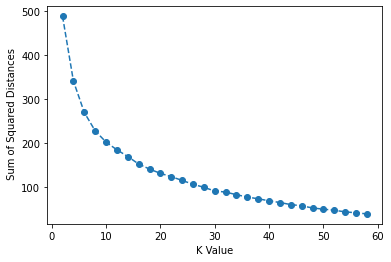

In [66]:
plt.plot(range(2,60,2),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

We can decide number of clusters using the above Figure with elbow method that is selecting the number of K where sharp decrease in SSE occurs. In this case, there is no sharp decrease. Therefore, we can select any appropriate value.

<br><br>

#### 3.2.2. Fitting Model

In [67]:
model = KMeans(n_clusters=15, random_state=101)
model.fit(scaled_X)

KMeans(n_clusters=15, random_state=101)

In [68]:
df_bycountry['Clusters'] = model.labels_

/Users/sevdeaydin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



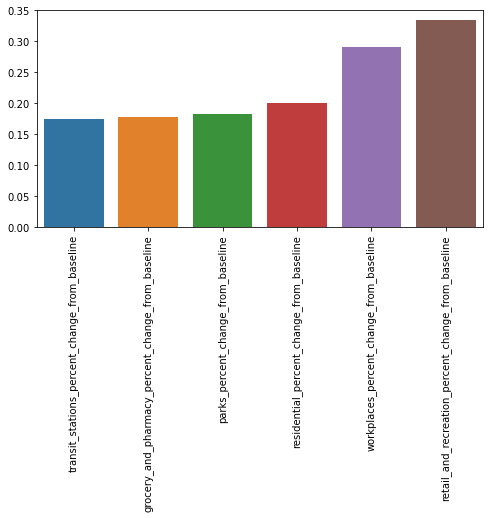

In [69]:
plt.figure(figsize=(8,4))
sns.barplot(df_bycountry.corr()['Clusters'].sort_values().index[:-1], df_bycountry.corr()['Clusters'].sort_values().values[:-1])
plt.xticks(rotation=90);

#### 3.2.3. Map Graph Analysis

In [70]:
iso_codes = pd.read_csv("../Traffic Studies/country_iso_codes.csv")

In [71]:
iso_codes.head()

,Country,ISO Code
0,Afghanistan,AFG
1,"Akrotiri and Dhekelia – See United Kingdom, The","Akrotiri and Dhekelia – See United Kingdom, The"
2,Åland Islands,ALA
3,Albania,ALB
4,Algeria,DZA


In [72]:
df_bycountry = df_bycountry.merge(iso_codes, how="left", left_on= "country_region" , right_on="Country")

In [73]:
df_bycountry.head()

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Clusters,Country,ISO Code
0,28.449121,68.016332,26.825093,-3.283099,-4.839829,4.635810,10,Afghanistan,AFG
1,18.976477,24.420701,49.769917,-1.894737,-0.017139,4.293880,5,Angola,AGO
2,1.362663,4.368609,59.826992,-34.857976,-26.130075,1.518855,13,Antigua and Barbuda,ATG
3,-21.459172,8.606587,-41.396810,-29.584405,2.255780,6.781469,7,Argentina,ARG
4,-5.042806,2.637337,30.442331,-38.437574,-13.986047,1.650474,13,Aruba,ABW


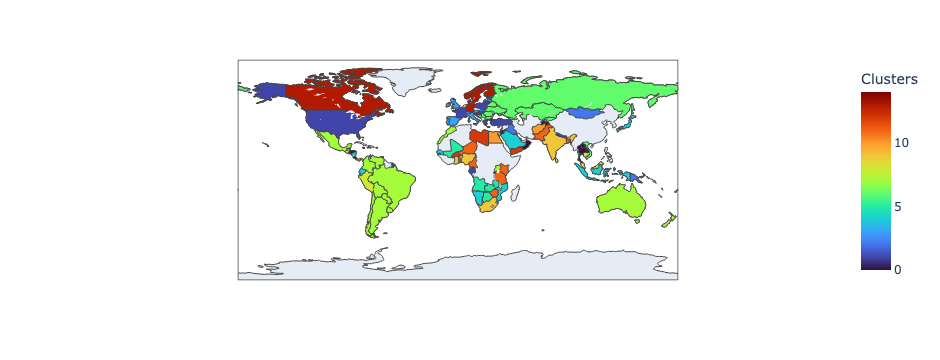

In [92]:
import plotly.express as px

fig = px.choropleth(df_bycountry, locations="ISO Code",
                    color="Clusters", 
                    hover_name="Country", 
                    color_continuous_scale='Turbo'
                    )
fig.show()

<img src='worldmap.png'/>

The above figure shows the world map, in which countries are colored by their clusters. At first look, it seems that neighbor countries shows similar behaviour, such as Asian countries, South American countries, Turkey-Greece. There is no clear sign of development levels affecting mobility behaviour. We can conclude that cultural habits affects the mobility more then development levels. We can create a GDP per capita versus mobility change graph colored by clusters to observe the relationship. The graph confirms that GDP per capita has no significant effect on mobility behaviour.

In [84]:
df_temp = df_bycountry.merge(df.groupby(["country_region"], as_index=False).mean()[["country_region","mean_percent_change", "gdp_per_cap_2020"]],
                   left_on="Country", right_on="country_region", how="left" )

In [85]:
df_temp.head()

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Clusters,Country,ISO Code,country_region,mean_percent_change,gdp_per_cap_2020
0,28.449121,68.016332,26.825093,-3.283099,-4.839829,4.635810,10,Afghanistan,AFG,Afghanistan,19.400426,516.747871
1,18.976477,24.420701,49.769917,-1.894737,-0.017139,4.293880,5,Angola,AGO,Angola,6.903192,1776.166868
2,1.362663,4.368609,59.826992,-34.857976,-26.130075,1.518855,13,Antigua and Barbuda,ATG,Antigua and Barbuda,-16.993265,13992.744480
3,-21.459172,8.606587,-41.396810,-29.584405,2.255780,6.781469,7,Argentina,ARG,Argentina,-11.841312,8579.017773
4,-5.042806,2.637337,30.442331,-38.437574,-13.986047,1.650474,13,Aruba,ABW,Aruba,-3.991416,NaN


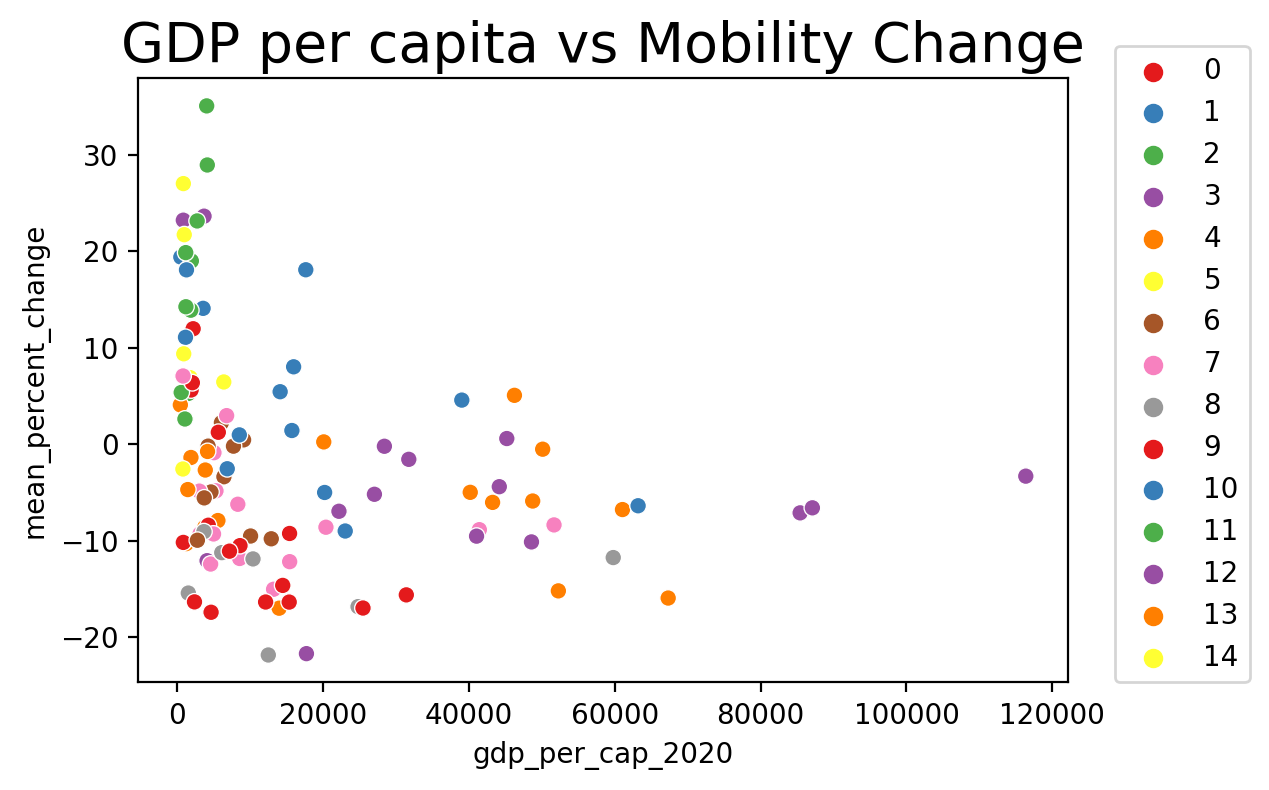

In [88]:
plt.figure(dpi=200)

sns.scatterplot(data=df_temp, x= "gdp_per_cap_2020", y="mean_percent_change", hue="Clusters", palette="Set1")

plt.legend(loc=(1.05,0))
plt.title("GDP per capita vs Mobility Change", fontsize=20);

<br><br><br>

### 3.3. DBScan Clustering

We should get a clean data first.

In [173]:
scaled_X = scaled_X_copy.copy()

In [174]:
df_bycountry = df_bycountry_copy.copy()

#### 3.3.1. Choosing Epsilon

In [175]:
from sklearn.cluster import DBSCAN

In [176]:
outlier_percent = []

for eps in np.linspace(0.001,3,50):
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=2*scaled_X.shape[1])
    dbscan.fit(scaled_X)
   
     
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

Text(0.5, 0, 'Epsilon Value')

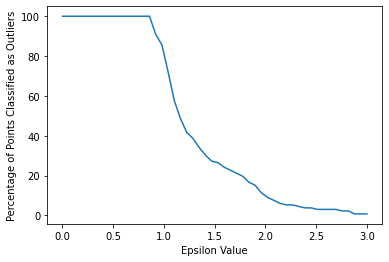

In [177]:
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

Based on the graph, we can choose 2 value for epsilon where percentage of outliers seems reasonable.

#### 3.3.2. Fitting Model

In [178]:
dbscan = DBSCAN(eps=2)

In [179]:
df_bycountry['Clusters'] = dbscan.fit_predict(scaled_X)

In [180]:
df_bycountry.groupby("Clusters").mean()

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
Clusters,,,,,,
-1,28.421013,54.917099,45.630354,21.226599,3.374062,3.764610
0,-7.263922,12.614830,10.083748,-15.232555,-12.571301,6.233016


/Users/sevdeaydin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



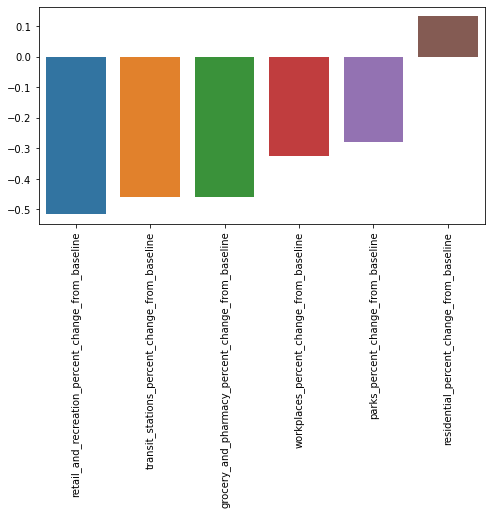

In [181]:
plt.figure(figsize=(8,4))
sns.barplot(df_bycountry.corr()['Clusters'].sort_values().index[:-1], df_bycountry.corr()['Clusters'].sort_values().values[:-1])
plt.xticks(rotation=90);

#### 3.3.3. Map Graph Analysis

In [182]:
iso_codes = pd.read_csv("../Traffic Studies/country_iso_codes.csv")

In [183]:
iso_codes.head()

,Country,ISO Code
0,Afghanistan,AFG
1,"Akrotiri and Dhekelia – See United Kingdom, The","Akrotiri and Dhekelia – See United Kingdom, The"
2,Åland Islands,ALA
3,Albania,ALB
4,Algeria,DZA


In [184]:
df_bycountry = df_bycountry.merge(iso_codes, how="left", left_on= "country_region" , right_on="Country")

In [185]:
df_bycountry.head()

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Clusters,Country,ISO Code
0,28.449121,68.016332,26.825093,-3.283099,-4.839829,4.635810,0,Afghanistan,AFG
1,18.976477,24.420701,49.769917,-1.894737,-0.017139,4.293880,0,Angola,AGO
2,1.362663,4.368609,59.826992,-34.857976,-26.130075,1.518855,0,Antigua and Barbuda,ATG
3,-21.459172,8.606587,-41.396810,-29.584405,2.255780,6.781469,0,Argentina,ARG
4,-5.042806,2.637337,30.442331,-38.437574,-13.986047,1.650474,0,Aruba,ABW


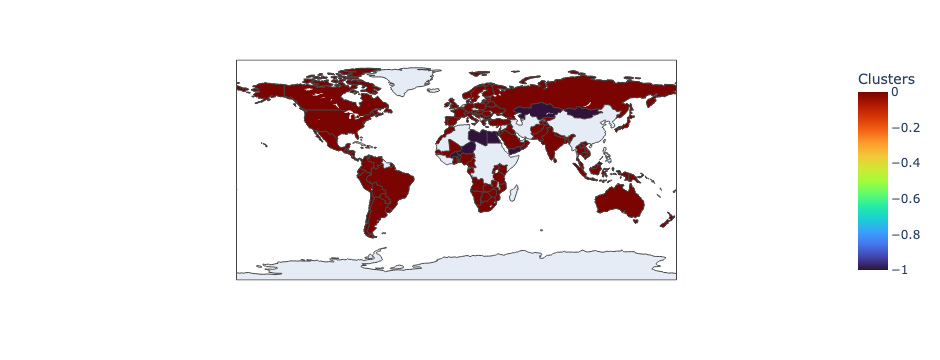

In [186]:
import plotly.express as px

fig = px.choropleth(df_bycountry, locations="ISO Code",
                    color="Clusters", 
                    hover_name="Country", 
                    color_continuous_scale='Turbo'
                    )
fig.show()

<img src='worldmap2.png'/>

The world map produced by DBScan doesn't give as much detailed information as KMeans. Yet, we can again say that neighbor countries shows similar behaviour. We can again argue that cultural habits affects the mobility more then development levels. 

In [187]:
df_temp = df_bycountry.merge(df.groupby(["country_region"], as_index=False).mean()[["country_region","mean_percent_change", "gdp_per_cap_2020"]],
                   left_on="Country", right_on="country_region", how="left" )

In [188]:
df_temp.head()

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Clusters,Country,ISO Code,country_region,mean_percent_change,gdp_per_cap_2020
0,28.449121,68.016332,26.825093,-3.283099,-4.839829,4.635810,0,Afghanistan,AFG,Afghanistan,19.400426,516.747871
1,18.976477,24.420701,49.769917,-1.894737,-0.017139,4.293880,0,Angola,AGO,Angola,6.903192,1776.166868
2,1.362663,4.368609,59.826992,-34.857976,-26.130075,1.518855,0,Antigua and Barbuda,ATG,Antigua and Barbuda,-16.993265,13992.744480
3,-21.459172,8.606587,-41.396810,-29.584405,2.255780,6.781469,0,Argentina,ARG,Argentina,-11.841312,8579.017773
4,-5.042806,2.637337,30.442331,-38.437574,-13.986047,1.650474,0,Aruba,ABW,Aruba,-3.991416,NaN


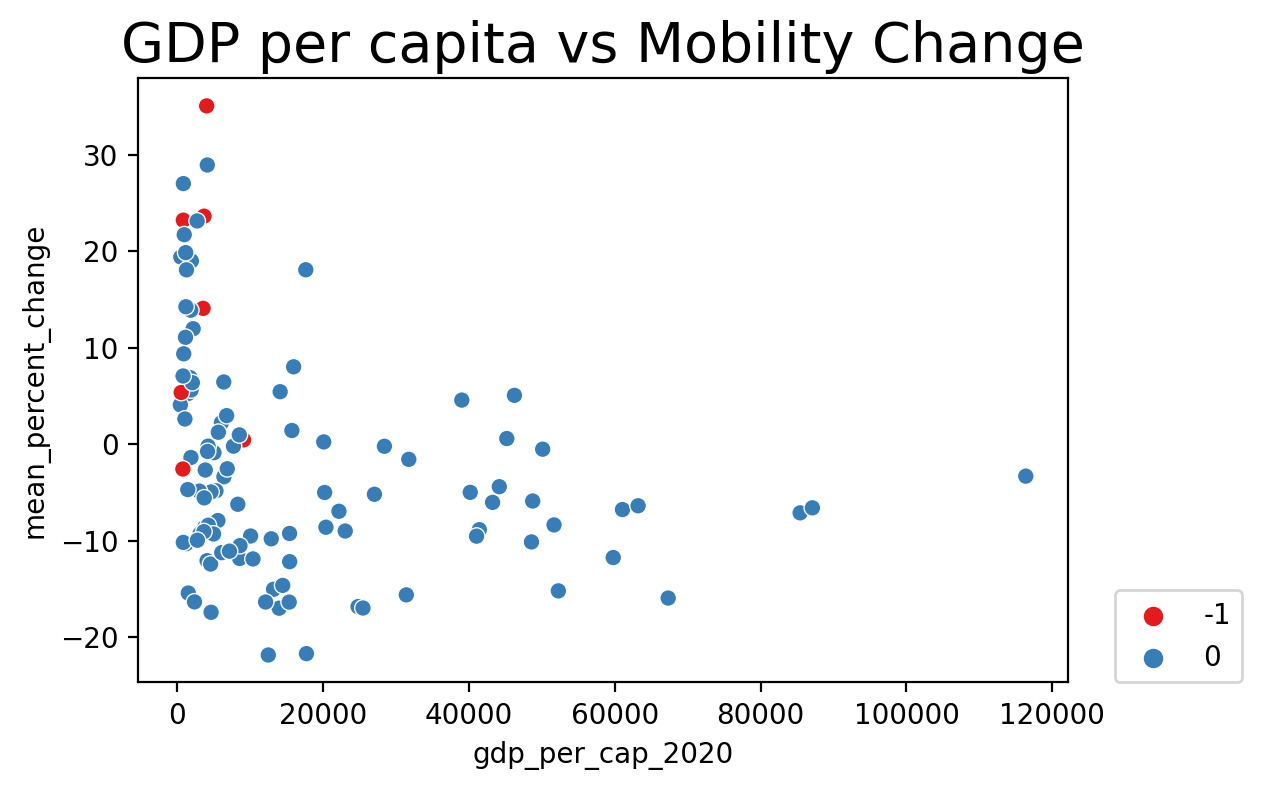

In [189]:
plt.figure(dpi=200)

sns.scatterplot(data=df_temp, x= "gdp_per_cap_2020", y="mean_percent_change", hue="Clusters", palette="Set1")

plt.legend(loc=(1.05,0))
plt.title("GDP per capita vs Mobility Change", fontsize=20);

## 4. Conclusion and Discussion

In this work, countries are clustered by their mobility change data during COVID19 pandemy provided by Google. 

The world map, in which countries are colored by their clusters shows that neighbor countries shows similar behaviour, such as Asian countries, South American countries, Turkey-Greece. There is no clear sign of development levels affecting mobility behaviour. We can conclude that cultural habits affects the mobility more then development levels. The GDP per capita versus mobility change graph colored by clusters confirms that GDP per capita has no significant effect on mobility behaviour.

Further studies can be conducted with different methods and focusing on different features. More data from other sources may conduct this research as well. This study is to gain an insight of the data only. 

The same dataframe is visualized with Tableau. You can check that from the following link: https://github.com/DrFarukAydin/data-science-portfolio/blob/main/data-visualization-tableau/data-visualization-tableau.ipynb

<br>

<br><br><br>

<br><br><br>